In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
pip install scikit-multilearn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 1.9 MB/s eta 0:00:00


In [ ]:
crop = pd.read_csv("/content/crop.csv")

crop.head(2700)

,N,P,K,temperature,humidity,ph,rainfall,label,soil
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1
...,...,...,...,...,...,...,...,...,...
2695,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,12
2696,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,12
2697,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,12
2698,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,12


In [ ]:
crop.label.value_counts()


rice           600
maize          500
mungbean       500
blackgram      400
cotton         400
coconut        400
chickpea       300
coffee         300
lentil         300
pigeonpeas     300
kidneybeans    200
jute           200
soybean        200
Name: label, dtype: int64

In [ ]:
pip install gspread pandas scikit-learn



In [ ]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall,soil
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,53.754424,51.598084,29.653626,25.160915,68.344145,6.564885,133.345312,7.652174
std,36.008795,17.992036,15.909991,3.885425,21.674274,0.700883,93.757679,3.129567
min,0.000000,5.000000,15.000000,15.330426,14.258040,4.548202,35.034848,1.000000
25%,23.000000,40.000000,19.000000,22.754660,61.145086,6.081568,66.855109,6.000000
50%,43.000000,54.000000,24.000000,25.404744,73.470357,6.556373,95.713885,8.000000
75%,84.000000,64.000000,36.000000,27.843952,83.527060,7.045543,182.654936,10.000000
max,140.000000,84.955314,85.000000,36.977944,99.981876,8.868741,499.988138,13.000000


In [ ]:
crop.apply(lambda x: len(x.isnull()))

N              4600
P              4600
K              4600
temperature    4600
humidity       4600
ph             4600
rainfall       4600
label          4600
soil           4600
dtype: int64

In [ ]:
assert crop.isnull().sum().sum() == 0

In [ ]:
crop.drop_duplicates(inplace= True)

In [ ]:
assert crop.duplicated().sum() == 0

In [ ]:
crop.apply(lambda x: len(x.unique()))

N               237
P               176
K               142
temperature    1300
humidity       1300
ph             1300
rainfall       1300
label            13
soil             13
dtype: int64

In [ ]:
print(crop['label'].unique())
print(" " , len(crop['label'].unique()))

['rice' 'maize' 'chickpea' 'kidneybeans' 'blackgram' 'cotton' 'coffee'
 'coconut' 'jute' 'lentil' 'mungbean' 'pigeonpeas' 'soybean']
  13


In [ ]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall,soil
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,53.754424,51.598084,29.653626,25.160915,68.344145,6.564885,133.345312,7.652174
std,36.008795,17.992036,15.909991,3.885425,21.674274,0.700883,93.757679,3.129567
min,0.000000,5.000000,15.000000,15.330426,14.258040,4.548202,35.034848,1.000000
25%,23.000000,40.000000,19.000000,22.754660,61.145086,6.081568,66.855109,6.000000
50%,43.000000,54.000000,24.000000,25.404744,73.470357,6.556373,95.713885,8.000000
75%,84.000000,64.000000,36.000000,27.843952,83.527060,7.045543,182.654936,10.000000
max,140.000000,84.955314,85.000000,36.977944,99.981876,8.868741,499.988138,13.000000


In [ ]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2700 entries, 0 to 2699
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2700 non-null   int64  
 1   P            2700 non-null   int64  
 2   K            2700 non-null   int64  
 3   temperature  2700 non-null   float64
 4   humidity     2700 non-null   float64
 5   ph           2700 non-null   float64
 6   rainfall     2700 non-null   float64
 7   label        2700 non-null   object 
 8   soil         2700 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 210.9+ KB


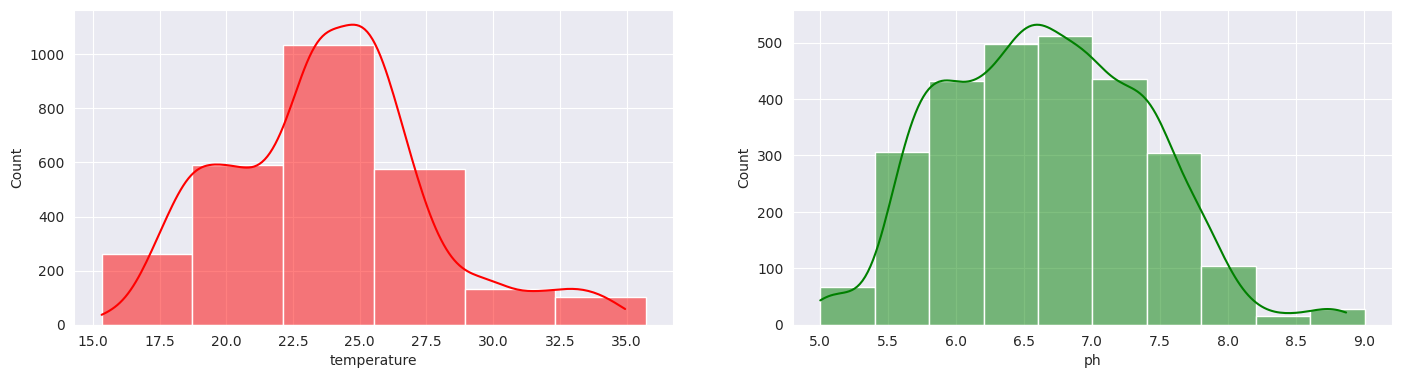

In [ ]:
plt.figure(figsize=(17,9))
plt.subplot(2,2,1)
sns.histplot(crop.temperature ,binwidth=3.4 , color="red" , kde={'alpha':0.5})
plt.subplot(2,2,2)
sns.histplot(crop.ph ,binwidth=0.4 ,color = "green", kde={'alpha':0.5})
plt.show()

<Axes: xlabel='humidity', ylabel='Count'>

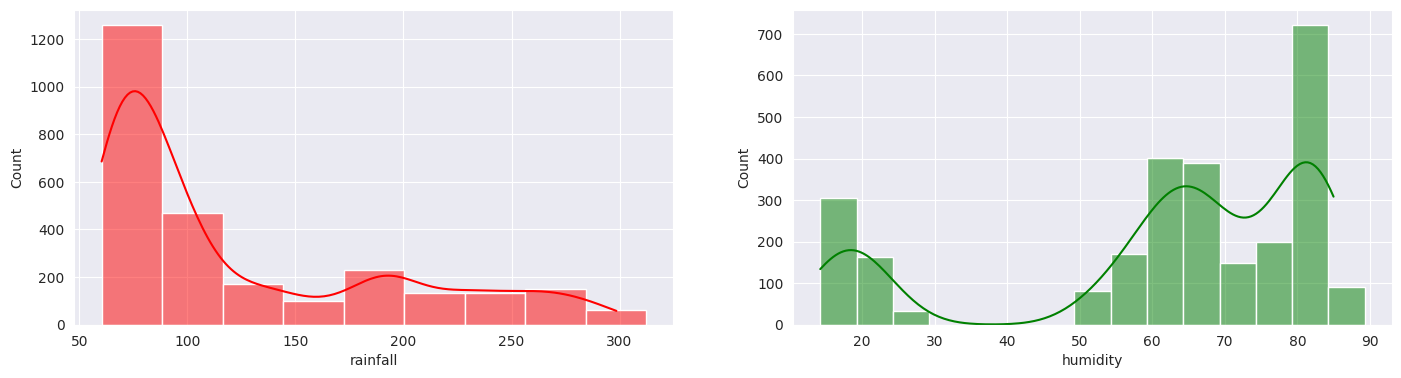

In [ ]:
plt.figure(figsize=(17,9))
plt.subplot(2,2,1)
sns.histplot(crop.rainfall ,  binwidth=28 ,color="red" , kde={'alpha':0.5})
plt.subplot(2,2,2)
sns.histplot(crop.humidity ,  binwidth=5 ,color="green" , kde={'alpha':0.5})

In [ ]:
print("Average Ratio of nitrogen in the soil : {0: .2f}".format(crop['N'].mean()))
print("Average Ratio of Phosphorous in the soil : {0: .2f}".format(crop['P'].mean()))
print("Average Ratio of Potassium in the soil : {0: .2f}".format(crop['K'].mean()))
print("Average temperature in Celsius : {0: .2f}".format(crop['temperature'].mean()))
print("Average Relative Humidity in % is : {0: .2f}".format(crop['humidity'].mean()))
print("Average pH value of the soil : {0: .2f}".format(crop['ph'].mean()))
print("Average Rain fall in mm : {0: .2f}".format(crop['rainfall'].mean()))

Average Ratio of nitrogen in the soil :  72.77
Average Ratio of Phosphorous in the soil :  52.12
Average Ratio of Potassium in the soil :  31.96
Average temperature in Celsius :  23.83
Average Relative Humidity in % is :  61.83
Average pH value of the soil :  6.66
Average Rain fall in mm :  124.45


<Axes: xlabel='Count', ylabel='label'>

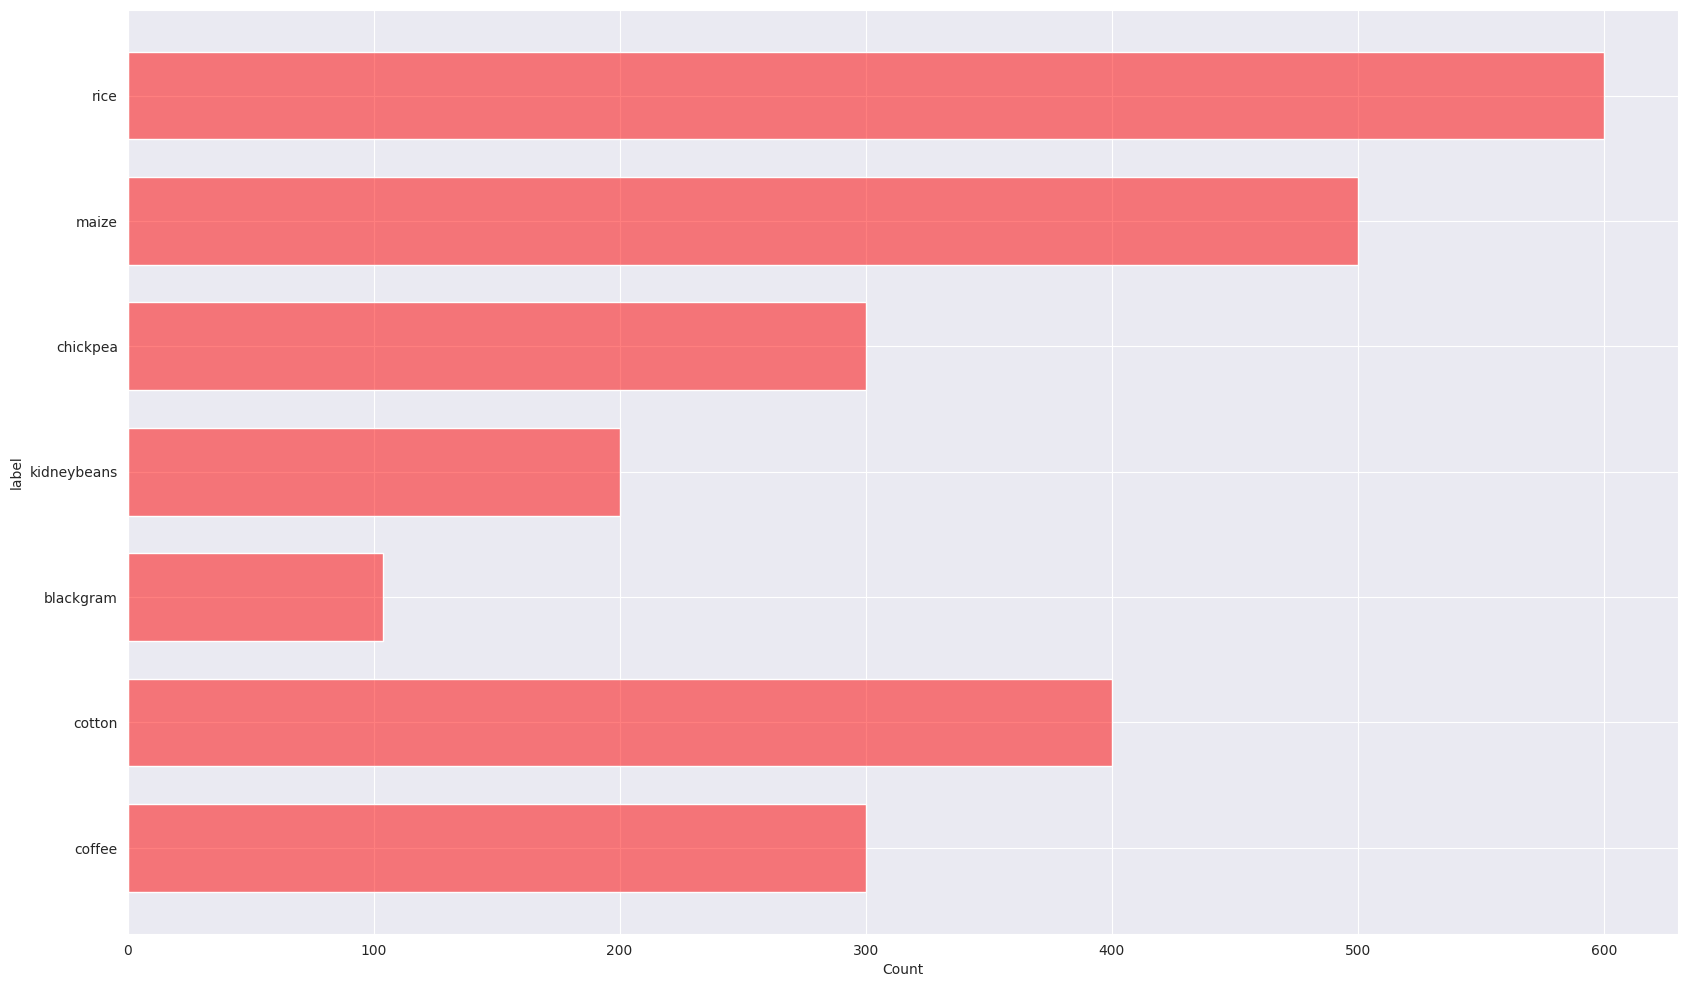

In [ ]:
plt.figure(figsize=(20,12))
Crop_Median_Temperatures =crop.query("temperature > 15  & temperature <= 28 ")
sns.histplot(y=Crop_Median_Temperatures.label, shrink=.7 ,color="red" , alpha=0.5 )

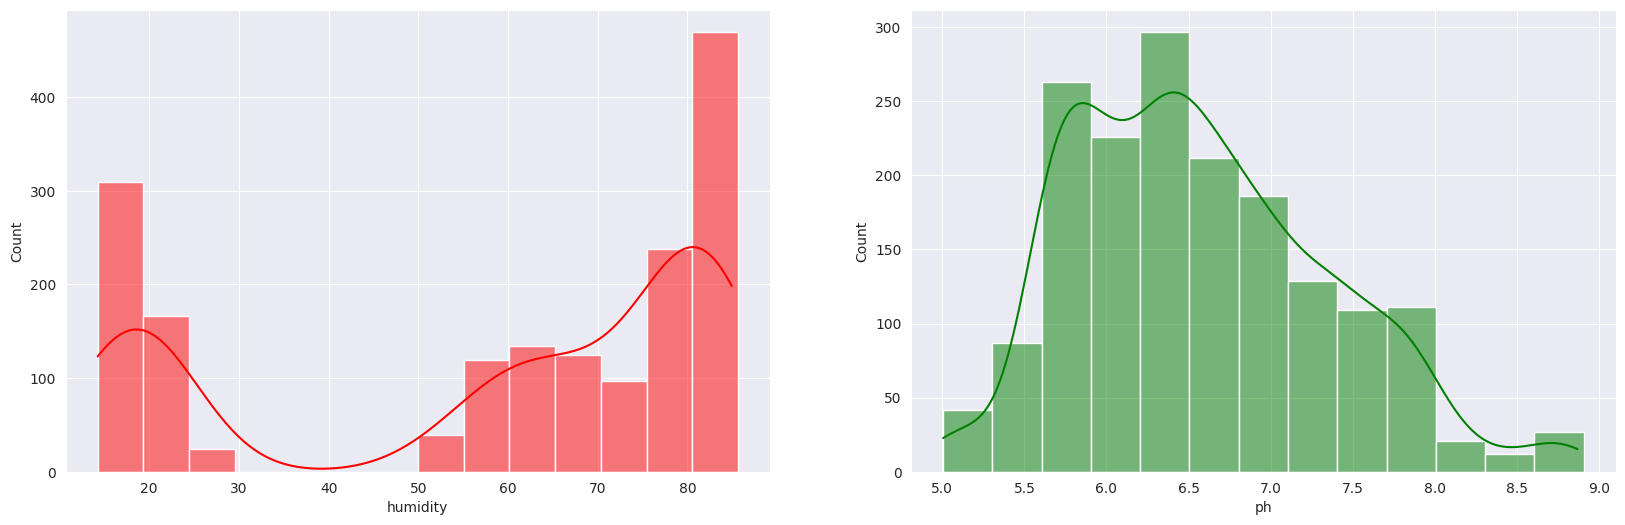

In [ ]:
plt.figure(figsize=(20,6))
Crop_Temperatures =crop.query("temperature < 25 ")
plt.subplot(1,2,1)
sns.histplot(Crop_Temperatures.humidity ,  binwidth=5.1 ,color="red" , kde={'alpha':0.5},)
plt.subplot(1,2,2)
sns.histplot(Crop_Temperatures.ph ,  binwidth=0.3 ,color="green" , kde={'alpha':0.5})
plt.show()

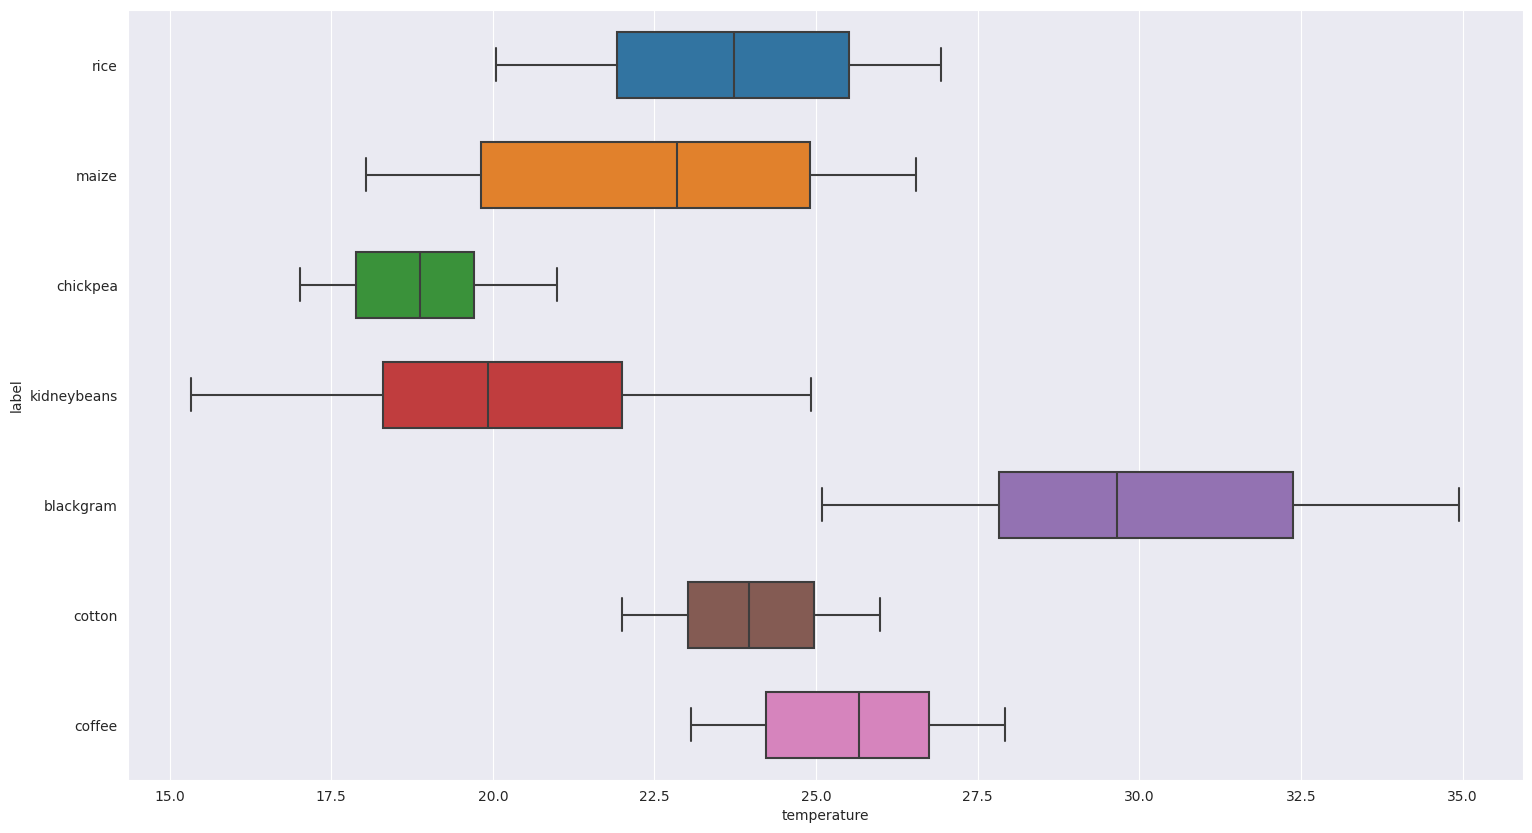

In [ ]:
plt.figure(figsize=(18,10))
sns.boxplot(x="temperature", y="label", data=crop,
            whis=[0, 100], width=.6 , orient="h")
plt.show()

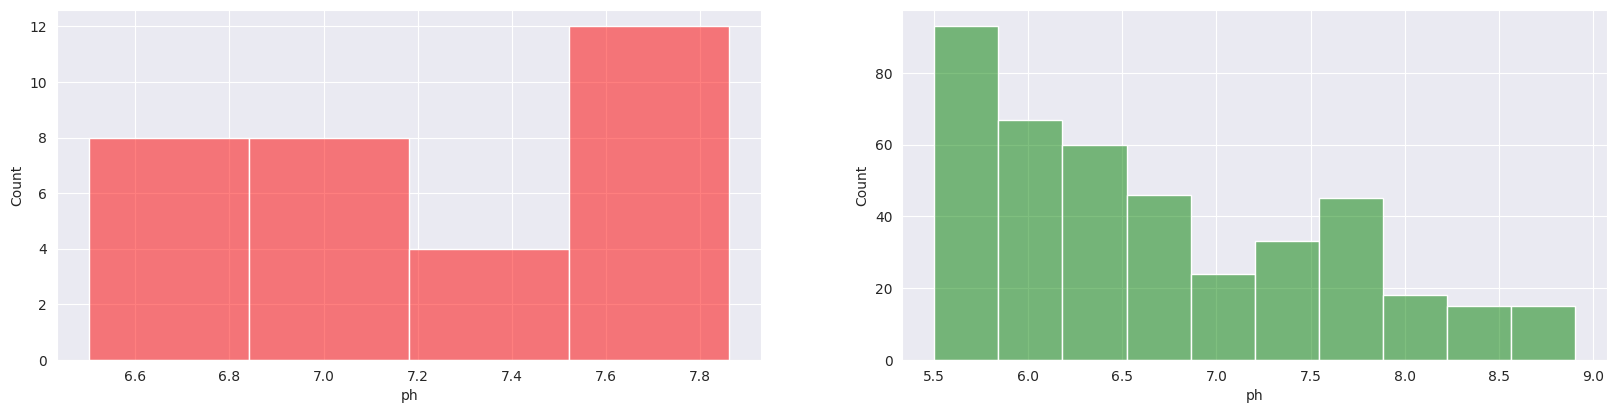

In [ ]:
Crop_high_Temperatures =crop.query("temperature > 34 ")
Crop_low_Temperatures =crop.query("temperature < 19.5 ")
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.histplot(Crop_high_Temperatures.ph , binwidth=.34,color="red" ,alpha=0.5,)
plt.subplot(2,2,2)
sns.histplot(Crop_low_Temperatures.ph , binwidth=.34  ,color="green" ,alpha=0.5)
plt.show()

In [ ]:
print( "Lowest pH value at low temperatures : " , Crop_low_Temperatures.ph.min())
print( "Lowest pH value at Highest temperatures : " , Crop_high_Temperatures.ph.min())
print("- -- -- --- --- -- --- ")
print( "Highest pH value at low temperatures : " , Crop_low_Temperatures.ph.max())
print( "Highest pH value at Highest temperatures : " , Crop_high_Temperatures.ph.max())
print("- -- -- --- --- -- --- ")
print( "Average pH value at low temperatures : " , Crop_low_Temperatures.ph.mean())
print( "Average pH value at Highest temperatures : " , Crop_high_Temperatures.ph.mean())

Lowest pH value at low temperatures :  5.502999119
Lowest pH value at Highest temperatures :  6.501869314
- -- -- --- --- -- --- 
Highest pH value at low temperatures :  8.868741443
Highest pH value at Highest temperatures :  7.741418772
- -- -- --- --- -- --- 
Average pH value at low temperatures :  6.688477860439903
Average pH value at Highest temperatures :  7.226452648875


In [ ]:
print("Summer Crops")
print(crop[(crop['temperature'] > 30) & (crop['humidity'] > 50)]['label'].unique())
print("-----------------------------------")
print("Winter Crops")
print(crop[(crop['temperature'] < 20) & (crop['humidity'] < 35)]['label'].unique())
print("-----------------------------------")
print("Rainy Crops")
print(crop[(crop['rainfall'] > 200) & (crop['humidity'] > 30)]['label'].unique())

Summer Crops
['blackgram' 'pigeonpeas']
-----------------------------------
Winter Crops
['chickpea' 'kidneybeans' 'pigeonpeas']
-----------------------------------
Rainy Crops
['rice' 'coconut' 'soybean']


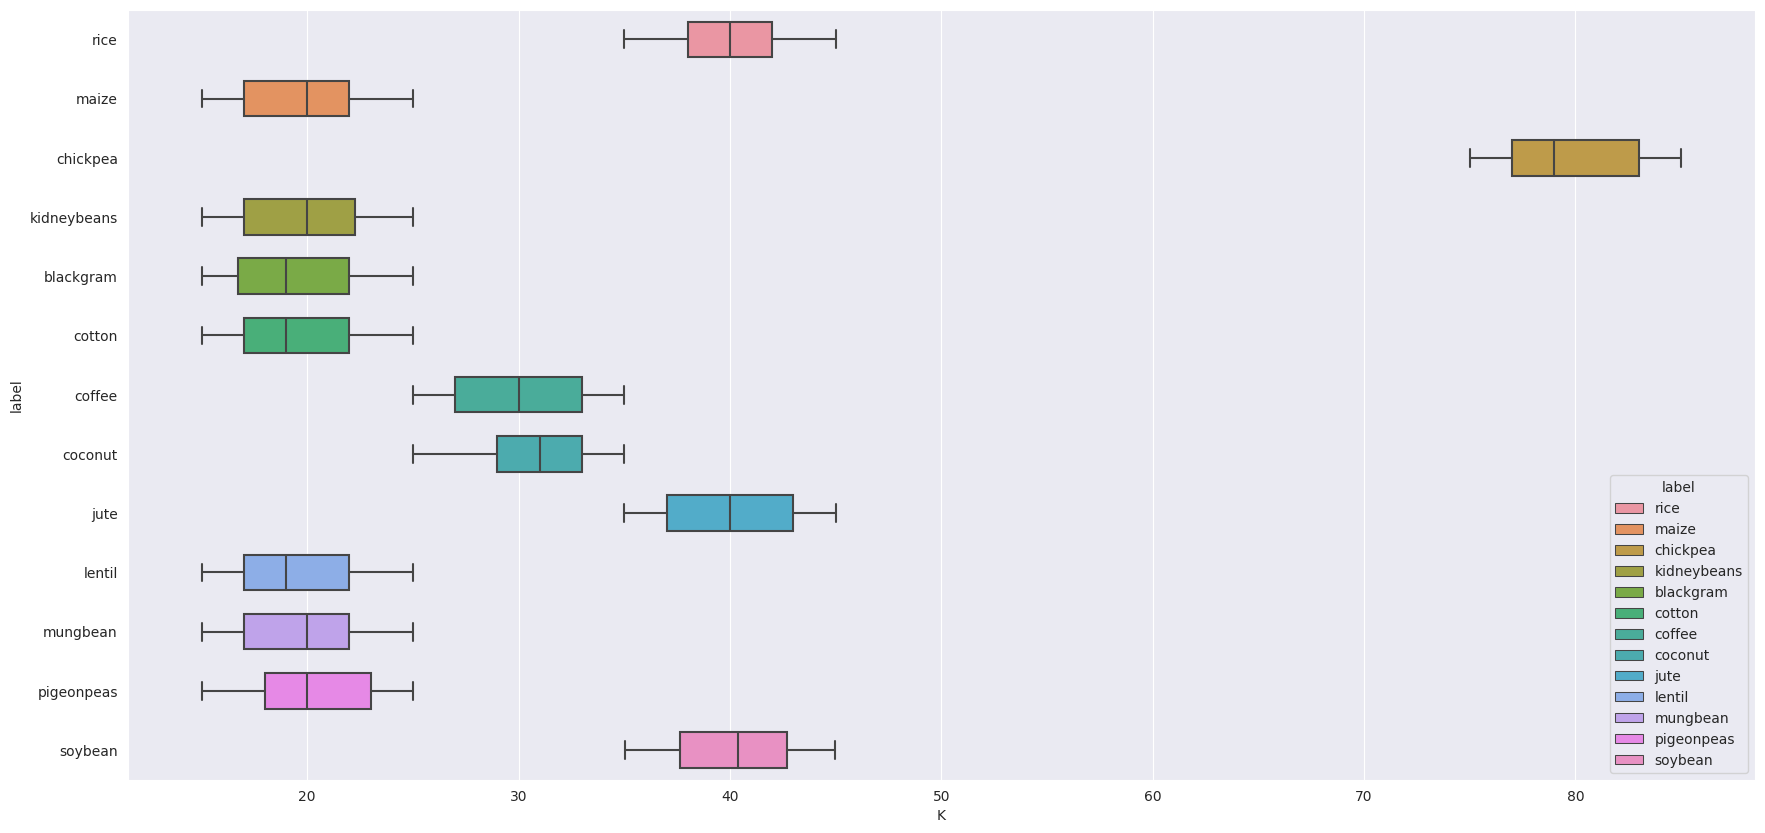

In [ ]:
plt.figure(figsize=(21,10))
sns.boxplot(x="K", y="label", data=crop,
            whis=[0, 100], width=0.6
            , orient="h" ,  hue="label" , dodge=False)
plt.show()

In [ ]:
print("Crops which requires very Low Ratio of Nitrogen Content in Soil:", crop[crop['N']  < 10]['label'].unique())
print("Crops which requires very High Ratio of Nitrogen Content in Soil:", crop[crop['N'] > 110]['label'].unique())
print("Crops which requires median Ratio of Nitrogen Content in Soil:", crop.query("N > 40 & N < 80")['label'].unique())

Crops which requires very Low Ratio of Nitrogen Content in Soil: ['kidneybeans']
Crops which requires very High Ratio of Nitrogen Content in Soil: ['cotton' 'coffee']
Crops which requires median Ratio of Nitrogen Content in Soil: ['rice' 'maize' 'chickpea' 'blackgram']


In [ ]:
print("Crops which requires very Low Ratio of Phosphorus Content in Soil:", crop[crop['P']  < 10]['label'].unique())
print("Crops which requires very High Ratio of Phosphorus Content in Soil:", crop[crop['P'] > 110]['label'].unique())
print("Crops which requires median Ratio of Phosphorus Content in Soil:", crop.query("P > 70 & P < 110")['label'].unique())

Crops which requires very Low Ratio of Phosphorus Content in Soil: []
Crops which requires very High Ratio of Phosphorus Content in Soil: []
Crops which requires median Ratio of Phosphorus Content in Soil: ['chickpea' 'kidneybeans' 'blackgram']


In [ ]:
print("Crops which requires very Low Ratio of Potassium Content in Soil:", crop[crop['K']  < 15]['label'].unique())
print("Crops which requires very High Ratio of Potassium Content in Soil:", crop[crop['K'] > 175]['label'].unique())
print("Crops which requires median Ratio of Potassium Content in Soil:", crop.query("K > 45 & K < 90")['label'].unique())

Crops which requires very Low Ratio of Potassium Content in Soil: []
Crops which requires very High Ratio of Potassium Content in Soil: []
Crops which requires median Ratio of Potassium Content in Soil: ['chickpea']


In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

@interact
def compare(conditions = ['N','P','K']):
    print()
    print("1- {con} level in soil relative to Rice : ".format(con = conditions))
    print("The Rice plant has the mean {con} content in the soil = ".format(con =conditions), crop[crop['label'] == "rice"][conditions].mean())
    print("The Rice plant has the lowest {con} content in the soil = ".format(con =conditions), crop[crop['label'] == "rice"][conditions].min())
    print("The Rice plant has the High {con} content in the soil = ".format(con =conditions), crop[crop['label'] == "rice"][conditions].max())
    print()
    print("2- {con} level in soil relative to Cotton : ".format(con = conditions))
    print("The Cotton plant has the mean {con} content in the soil = ".format(con =conditions), crop[crop['label'] == "cotton"][conditions].mean())
    print("The Cotton plant has the lowest {con} content in the soil = ".format(con =conditions), crop[crop['label'] == "cotton"][conditions].min())
    print("The Cotton plant has the High {con} content in the soil = ".format(con =conditions), crop[crop['label'] == "cotton"][conditions].max())
    print()
    print("3- {con} level in soil relative to coffee : ".format(con = conditions))
    print("The coffee plant has the mean {con} content in the soil = ".format(con =conditions), crop[crop['label'] == "coffee"][conditions].mean())
    print("The coffee plant has the lowest {con} content in the soil = ".format(con =conditions), crop[crop['label'] == "coffee"][conditions].min())
    print("The coffee plant has the High {con} content in the soil = ".format(con =conditions), crop[crop['label'] == "coffee"][conditions].max())
    print()
    print("4- {con} level in soil relative to kidneybeans : ".format(con = conditions))
    print("The kidneybeans plant has the mean {con} content in the soil = ".format(con =conditions), crop[crop['label'] == "kidneybeans"][conditions].mean())
    print("The kidneybeans plant has the lowest {con} content in the soil = ".format(con =conditions), crop[crop['label'] == "kidneybeans"][conditions].min())
    print("The kidneybeans plant has the High {con} content in the soil = ".format(con =conditions), crop[crop['label'] == "kidneybeans"][conditions].max())
    print()
    print("5- {con} level in soil relative to Maize : ".format(con = conditions))
    print("The Maize plant has the mean {con} content in the soil = ".format(con =conditions), crop[crop['label'] == "maize"][conditions].mean())
    print("The Maize plant has the lowest {con} content in the soil = ".format(con =conditions), crop[crop['label'] == "maize"][conditions].min())
    print("The Maize plant has the High {con} content in the soil = ".format(con =conditions), crop[crop['label'] == "maize"][conditions].max())
    print()
    print("6- {con} level in soil relative to chickpea : ".format(con = conditions))
    print("The chickpea plant has the mean {con} content in the soil = ".format(con =conditions), crop[crop['label'] == "chickpea"][conditions].mean())
    print("The chickpea plant has the lowest {con} content in the soil = ".format(con =conditions), crop[crop['label'] == "chickpea"][conditions].min())
    print("The chickpea plant has the High {con} content in the soil = ".format(con =conditions), crop[crop['label'] == "chickpea"][conditions].max())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K'), value='N'), Output()), _dom_…

In [ ]:
high_rainfall = crop.query("rainfall > 100")
low_rainfall = crop.query("rainfall < 80")
print( "Lowest humidtiy value at low rainfall : " , low_rainfall.humidity.min())
print( "Lowest humidtiy value at Highest rainfall : " , high_rainfall.humidity.min())
print("- -- -- --- --- -- --- ")
print( "Highest humidtiy value at low rainfall : " , low_rainfall.humidity.max())
print( "Highest humidtiy value at Highest rainfall : " , high_rainfall.humidity.max())
print("- -- -- --- --- -- --- ")
print( "Average humidtiy value at low rainfall : " , low_rainfall.humidity.mean())
print( "Average humidtiy value at Highest rainfall : " , high_rainfall.humidity.mean())

Lowest humidtiy value at low rainfall :  14.2804191
Lowest humidtiy value at Highest rainfall :  18.09224048
- -- -- --- --- -- --- 
Highest humidtiy value at low rainfall :  89.99615558
Highest humidtiy value at Highest rainfall :  99.98187601
- -- -- --- --- -- --- 
Average humidtiy value at low rainfall :  67.18171468596792
Average humidtiy value at Highest rainfall :  72.75175886779027


In [ ]:
soil_types={1:"alluvial",2:"red yellow",3:"red loamy",4:"laterite",5:"red sandy",6:"black",7:"old alluvial",8:"loamy",9:"silt loam",10:"sandy loam",11:"clay loam",12:"red"}


In [ ]:
x = crop.drop(['label'], axis = 1)
y = crop['label']

print("The Shape of x:", x.shape)
print("The Shape of y:", y.shape)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

The Shape of x: (4400, 8)
The Shape of y: (4400,)


In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20,shuffle = True, random_state = 210)

In [2]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

NameError: ignored

In [ ]:
X_train

array([[0.20714286, 0.04      , 0.18571429, ..., 0.35926704, 0.6806863 ,
        0.        ],
       [0.02142857, 0.84      , 0.01428571, ..., 0.096443  , 0.27487805,
        0.75      ],
       [0.6       , 0.69333333, 0.14285714, ..., 0.44921203, 0.11146488,
        0.75      ],
       ...,
       [0.23571429, 0.96      , 0.08571429, ..., 0.57045035, 0.13892962,
        0.41666667],
       [0.71428571, 0.46666667, 0.07142857, ..., 0.6674726 , 0.19662304,
        0.75      ],
       [0.47857143, 0.72      , 0.37142857, ..., 0.33894622, 0.67667607,
        0.41666667]])

In [ ]:
kn_classifier = KNeighborsClassifier()
kn_classifier.fit(X_train,y_train)
import pickle

# Save the trained model to a file
model_filename = "/content/trained_knn_model.pkl"
with open(model_filename, 'wb') as model_file:
    pickle.dump(kn_classifier, model_file)

In [ ]:
# ... (previous code)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# ... (previous code)

# Step 2: Get user input
user_input = []
for feature_name in ["N", "P", "K" , "temperature", "humidity", "ph", "rainfall", "soil"]:
    value = float(input(f"Enter value for {feature_name}: "))
    user_input.append(value)

user_input_scaled = scaler.transform([user_input])  # Scale user input
predicted_class = kn_classifier.predict(user_input_scaled)

# Step 5: Display prediction
print(f"Predicted crop class: {predicted_class[0]}")

Enter value for N: 23
Enter value for P: 23
Enter value for K: 23
Enter value for temperature: 23
Enter value for humidity: 80
Enter value for ph: 5
Enter value for rainfall: 144
Enter value for soil: 11
Predicted crop class: ['rice']


In [ ]:
y_pred=kn_classifier.predict(X_test)

In [ ]:
pred_kn = kn_classifier.predict(X_test)

In [ ]:
print('Train accuracy: {:.4f}'.format(kn_classifier.score(X_train, y_train)))
print('Test accuracy: {:.4f}'.format(kn_classifier.score(X_test, y_test)))


Train accuracy: 0.9940
Test accuracy: 0.9837
